In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [ ]:
df=pd.read_csv('/content/h1n1_vaccine_prediction (2) (1).csv')

In [ ]:
os.listdir

<function posix.listdir(path=None)>

In [ ]:
vaccine = pd.read_csv('h1n1_vaccine_prediction (2) (1).csv')
vaccine.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0.0


In [ ]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750 entries, 0 to 6749
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  6750 non-null   int64  
 1   h1n1_worry                 6724 non-null   float64
 2   h1n1_awareness             6719 non-null   float64
 3   antiviral_medication       6734 non-null   float64
 4   contact_avoidance          6692 non-null   float64
 5   bought_face_mask           6743 non-null   float64
 6   wash_hands_frequently      6743 non-null   float64
 7   avoid_large_gatherings     6726 non-null   float64
 8   reduced_outside_home_cont  6725 non-null   float64
 9   avoid_touch_face           6714 non-null   float64
 10  dr_recc_h1n1_vacc          6202 non-null   float64
 11  dr_recc_seasonal_vacc      6202 non-null   float64
 12  chronic_medic_condition    6515 non-null   float64
 13  cont_child_undr_6_mnths    6553 non-null   float

In [ ]:
vaccine.shape

(6750, 34)

In [ ]:
vaccine.dtypes.value_counts()

float64    24
object      9
int64       1
dtype: int64

In [ ]:
vaccine.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [ ]:
vaccine.drop(['unique_id'], inplace = True, axis = 1)

In [ ]:
vaccine.isnull().sum()

h1n1_worry                     26
h1n1_awareness                 31
antiviral_medication           16
contact_avoidance              58
bought_face_mask                7
wash_hands_frequently           7
avoid_large_gatherings         24
reduced_outside_home_cont      25
avoid_touch_face               36
dr_recc_h1n1_vacc             548
dr_recc_seasonal_vacc         548
chronic_medic_condition       235
cont_child_undr_6_mnths       197
is_health_worker              193
has_health_insur             3095
is_h1n1_vacc_effective        110
is_h1n1_risky                  94
sick_from_h1n1_vacc            97
is_seas_vacc_effective        118
is_seas_risky                 126
sick_from_seas_vacc           135
age_bracket                     0
qualification                 357
race                            0
sex                             0
income_level                 1091
marital_status                359
housing_status                526
employment                    373
census_msa    

In [ ]:
vaccine['h1n1_worry'].unique()

array([ 1.,  3.,  2.,  0., nan])

<function matplotlib.pyplot.show(close=None, block=None)>

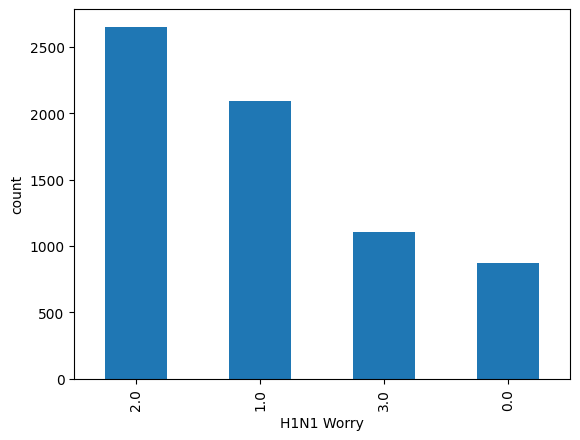

In [ ]:
vaccine['h1n1_worry'].value_counts().plot(kind = 'bar')
plt.xlabel('H1N1 Worry')
plt.ylabel('count')
plt.show

In [ ]:
display(vaccine['h1n1_worry'].mode(), vaccine['h1n1_worry'].median())

0    2.0
Name: h1n1_worry, dtype: float64

2.0

In [ ]:
vaccine['h1n1_worry'].fillna(vaccine['h1n1_worry'].mode()[0],inplace = True)

In [ ]:
vaccine['h1n1_awareness'].unique()

array([ 0.,  2.,  1., nan])

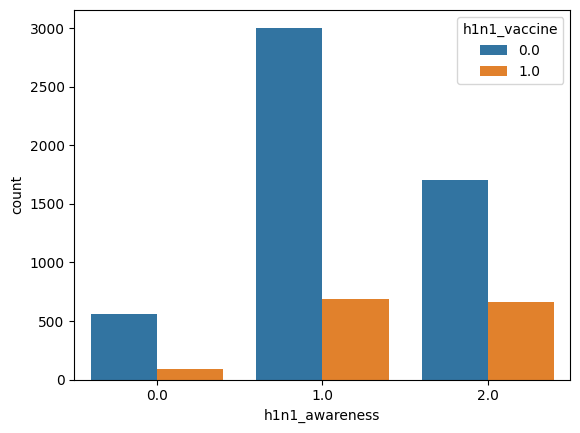

In [ ]:
sns.countplot(x = 'h1n1_awareness', data = vaccine, hue = 'h1n1_vaccine')
plt.show()

In [ ]:
vaccine['h1n1_awareness'].mode()

0    1.0
Name: h1n1_awareness, dtype: float64

In [ ]:
vaccine['h1n1_awareness'].fillna(vaccine['h1n1_awareness'].mode()[0], inplace = True)

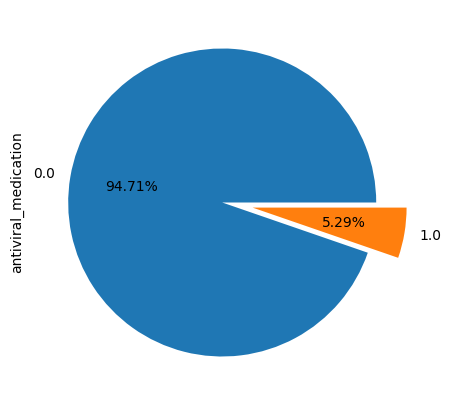

In [ ]:
vaccine['antiviral_medication'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = [5,5], explode = [0,0.2])
plt.show()

In [ ]:
display(vaccine['antiviral_medication'].mode())
vaccine['antiviral_medication'].fillna(vaccine['antiviral_medication'].mode()[0], inplace = True)


0    0.0
Name: antiviral_medication, dtype: float64

In [ ]:
vaccine['contact_avoidance'].unique()

array([ 0.,  1., nan])

In [ ]:
vaccine['contact_avoidance'].value_counts()

1.0    4774
0.0    1918
Name: contact_avoidance, dtype: int64

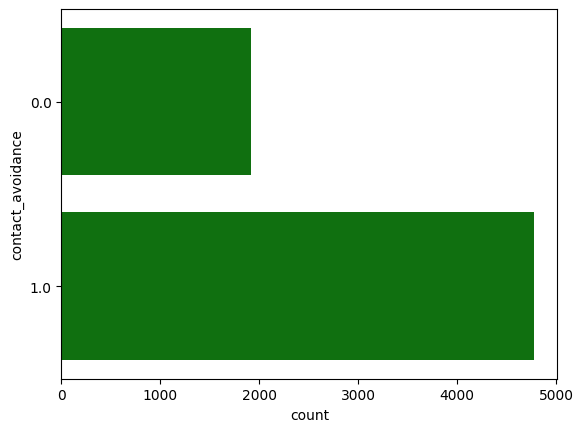

In [ ]:
sns.countplot(y = 'contact_avoidance', data = vaccine, color = 'green')
plt.show()

In [ ]:
vaccine['contact_avoidance'].fillna(vaccine['contact_avoidance'].mode()[0], inplace = True)

In [ ]:
 vaccine['bought_face_mask'].unique()

array([ 0.,  1., nan])

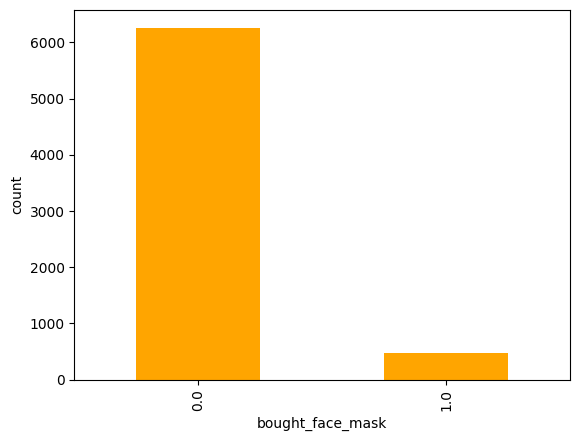

In [ ]:
vaccine['bought_face_mask'].value_counts().plot(kind = 'bar', color = 'orange')
plt.xlabel('bought_face_mask')
plt.ylabel('count')
plt.show()

In [ ]:
vaccine['bought_face_mask'].fillna(vaccine['bought_face_mask'].mode()[0], inplace = True)

In [ ]:
vaccine['wash_hands_frequently'].unique()

array([ 0.,  1., nan])

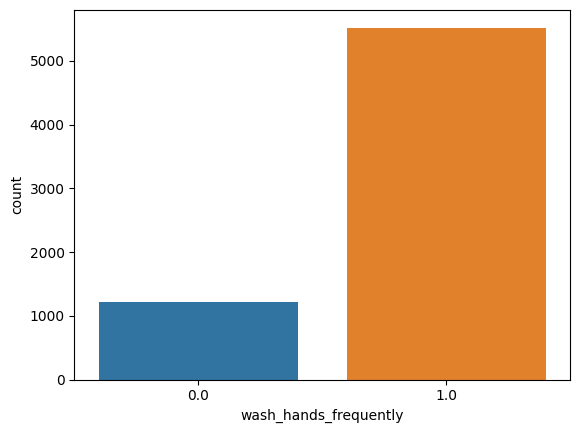

In [ ]:
sns.countplot(x = 'wash_hands_frequently', data = vaccine)
plt.show()

In [ ]:
vaccine['wash_hands_frequently'].fillna(vaccine['wash_hands_frequently'].mode()[0], inplace = True)

In [ ]:
vaccine['avoid_large_gatherings'].unique()

array([ 0.,  1., nan])

In [ ]:
vaccine['avoid_large_gatherings'].value_counts()

0.0    4338
1.0    2388
Name: avoid_large_gatherings, dtype: int64

In [ ]:
vaccine['avoid_large_gatherings'].fillna(vaccine['avoid_large_gatherings'].mode()[0], inplace = True)

In [ ]:
vaccine['reduced_outside_home_cont'].unique()

array([ 1.,  0., nan])

In [ ]:
vaccine['reduced_outside_home_cont'].value_counts()

0.0    4507
1.0    2218
Name: reduced_outside_home_cont, dtype: int64

In [ ]:
vaccine['reduced_outside_home_cont'].fillna(vaccine['reduced_outside_home_cont'].mode()[0], inplace = True)

In [ ]:
vaccine['avoid_touch_face'].unique()

array([ 1.,  0., nan])

In [ ]:
vaccine['avoid_touch_face'].value_counts()

1.0    4510
0.0    2204
Name: avoid_touch_face, dtype: int64

In [ ]:
vaccine['avoid_touch_face'].fillna(vaccine['avoid_touch_face'].mode()[0], inplace = True)

In [ ]:
display(vaccine['dr_recc_h1n1_vacc'].unique(),vaccine['dr_recc_seasonal_vacc'].unique())

array([ 0., nan,  1.])

array([ 0., nan,  1.])

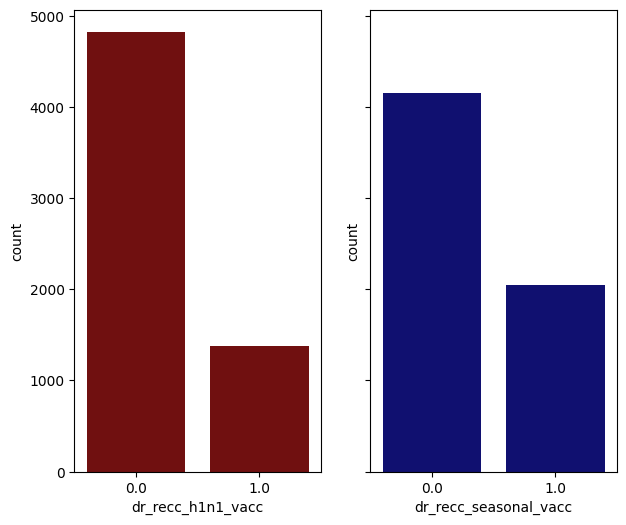

In [ ]:
fig, ax = plt.subplots(1,2, figsize = [7,6], sharey = True)
sns.countplot(x = 'dr_recc_h1n1_vacc', data = vaccine, color = 'maroon', ax=ax[0])
sns.countplot(x = 'dr_recc_seasonal_vacc', data = vaccine, color = 'navy', ax=ax[1])
plt.show()

In [ ]:
vaccine['dr_recc_h1n1_vacc'].fillna(vaccine['dr_recc_h1n1_vacc'].mode()[0], inplace = True)
vaccine['dr_recc_seasonal_vacc'].fillna(vaccine['dr_recc_seasonal_vacc'].mode()[0], inplace = True)

In [ ]:
vaccine['chronic_medic_condition'].value_counts()

0.0    4709
1.0    1806
Name: chronic_medic_condition, dtype: int64

In [ ]:
vaccine['chronic_medic_condition'].fillna(vaccine['chronic_medic_condition'].mode()[0], inplace = True)

<Axes: >

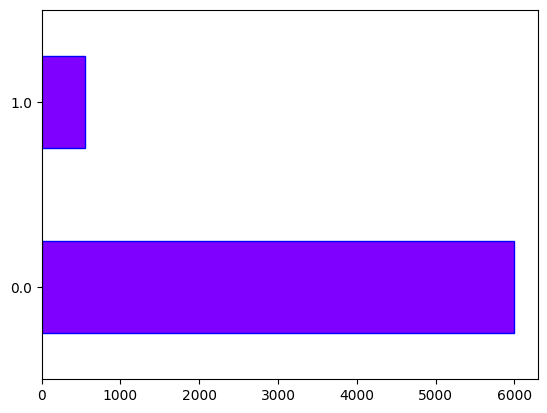

In [ ]:
vaccine['cont_child_undr_6_mnths'].value_counts().plot(kind = 'barh', cmap = 'rainbow', edgecolor = 'b')

In [ ]:
vaccine['cont_child_undr_6_mnths'].fillna(vaccine['cont_child_undr_6_mnths'].mode()[0], inplace = True)

In [ ]:
vaccine['is_health_worker'].value_counts()

0.0    5810
1.0     747
Name: is_health_worker, dtype: int64

In [ ]:
vaccine['is_health_worker'].fillna(vaccine['is_health_worker'].mode()[0], inplace = True)

In [ ]:
vaccine['has_health_insur'].unique()

array([ 1., nan,  0.])

<Axes: >

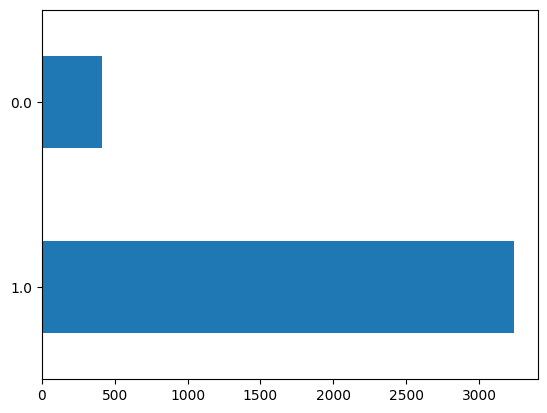

In [ ]:
vaccine['has_health_insur'].value_counts().plot(kind = 'barh')

In [ ]:
vaccine['has_health_insur'].fillna(2.0, inplace = True)

<Axes: >

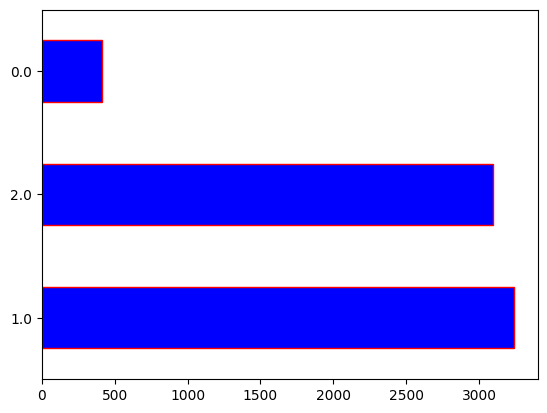

In [ ]:
vaccine['has_health_insur'].value_counts().plot(kind = 'barh' , color = 'b',edgecolor =  'r')

In [ ]:
display(vaccine['is_h1n1_vacc_effective'].unique(),vaccine['is_seas_vacc_effective'].unique())

array([ 3.,  5.,  4.,  2.,  1., nan])

array([ 2.,  4.,  5.,  3.,  1., nan])

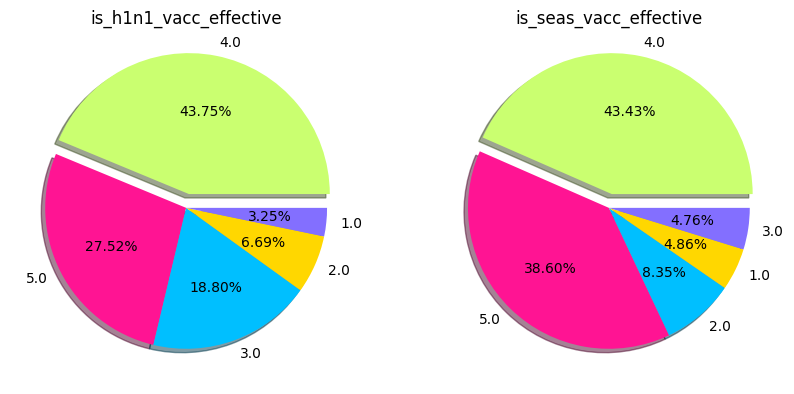

In [ ]:
colors = ['#CAFF70', '#FF1493', '#00BFFF', '#FFD700', '#836FFF']
Colors1 = ['#FF7F24', '#FFB90F', '#A2CD5A', '#BF3EFF', '#EEAEEE']
fig, (ax1,ax2) = plt.subplots(1,2, figsize = [10,10])

ax1.pie(vaccine['is_h1n1_vacc_effective'].value_counts(), labels = vaccine['is_h1n1_vacc_effective'].value_counts().index ,
        autopct = '%0.2f%%', explode= [0.1,0,0,0,0], colors = colors, shadow = True)
ax2.pie(vaccine['is_seas_vacc_effective'].value_counts(), labels = vaccine['is_seas_vacc_effective'].value_counts().index ,
        autopct = '%0.2f%%', explode= [0.1,0,0,0,0], colors = colors, shadow = True)
ax1.set_title('is_h1n1_vacc_effective')
ax2.set_title('is_seas_vacc_effective')

plt.show()

In [ ]:
vaccine['is_h1n1_vacc_effective'].fillna(vaccine['is_h1n1_vacc_effective'].mode()[0], inplace = True)
vaccine['is_seas_vacc_effective'].fillna(vaccine['is_seas_vacc_effective'].mode()[0], inplace = True)

In [ ]:
display(vaccine['is_h1n1_risky'].unique(),vaccine['is_seas_risky'].unique())

array([ 1.,  4.,  3.,  2.,  5., nan])

array([ 1.,  2.,  4.,  3.,  5., nan])

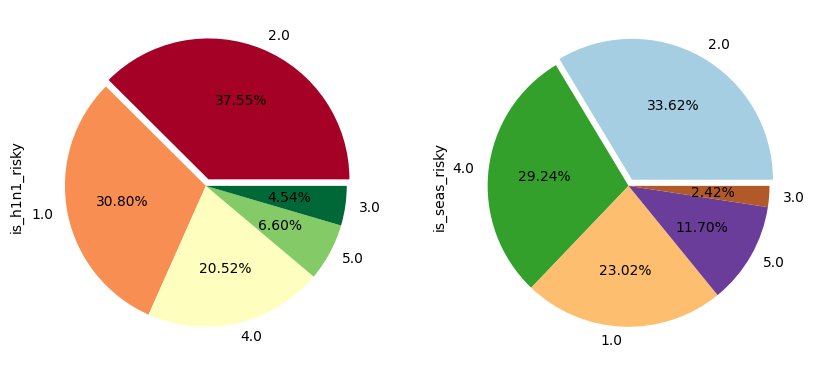

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = [10,10])
vaccine['is_h1n1_risky'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', explode = [0.05,0,0,0,0], cmap = 'RdYlGn', ax = ax[0])
vaccine['is_seas_risky'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', explode = [0.05,0,0,0,0], cmap = 'Paired', ax = ax[1])
plt.show()

In [ ]:
vaccine['is_h1n1_risky'].fillna(vaccine['is_h1n1_risky'].mode()[0], inplace = True)
vaccine['is_seas_risky'].fillna(vaccine['is_seas_risky'].mode()[0], inplace = True)

In [ ]:
display(vaccine['sick_from_h1n1_vacc'].unique(), vaccine['sick_from_seas_vacc'].unique())

array([ 2.,  4.,  1.,  5.,  3., nan])

array([ 2.,  4.,  1.,  5., nan,  3.])

<function matplotlib.pyplot.show(close=None, block=None)>

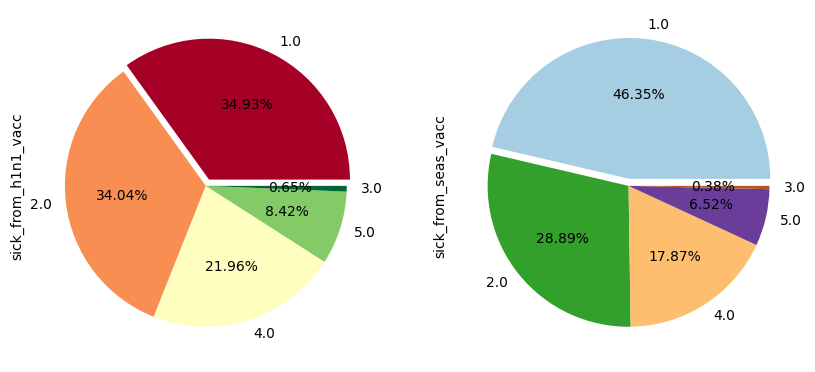

In [ ]:
fig, ax = plt.subplots(1,2, figsize = [10,10])
vaccine['sick_from_h1n1_vacc'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', explode = [0.05,0,0,0,0], cmap = 'RdYlGn', ax = ax[0])
vaccine['sick_from_seas_vacc'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', explode = [0.05,0,0,0,0], cmap = 'Paired', ax = ax[1])
plt.show


In [ ]:
vaccine['sick_from_h1n1_vacc'].fillna(vaccine['sick_from_h1n1_vacc'].mode()[0], inplace = True)
vaccine['sick_from_seas_vacc'].fillna(vaccine['sick_from_seas_vacc'].mode()[0], inplace = True)

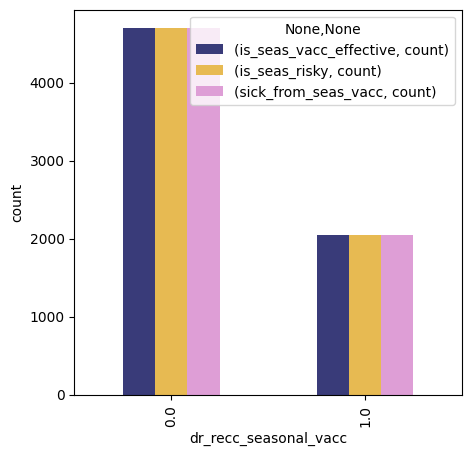

In [ ]:
vaccine.groupby(['dr_recc_seasonal_vacc']).agg({'is_seas_vacc_effective' : ['count'],
                                           'is_seas_risky' :['count'],
                                           'sick_from_seas_vacc' : ['count']}).plot(kind = 'bar', cmap = 'tab20b', figsize = [5,5])
plt.ylabel('count')
plt.show()

Text(0, 0.5, 'count')

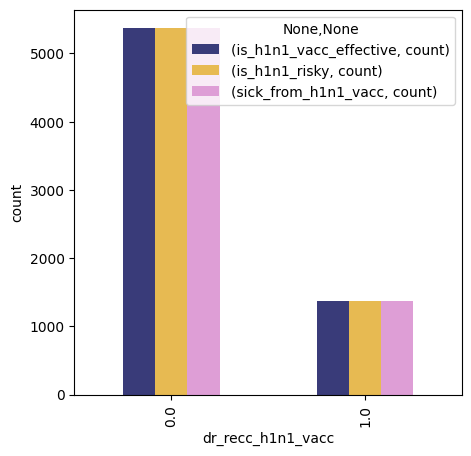

In [ ]:
vaccine.groupby(['dr_recc_h1n1_vacc']).agg({'is_h1n1_vacc_effective' : ['count'],
                                           'is_h1n1_risky' :['count'],
                                           'sick_from_h1n1_vacc' : ['count']}).plot(kind = 'bar', cmap = 'tab20b', figsize = [5,5])
plt.ylabel('count')

In [ ]:
vaccine['qualification'].unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan],
      dtype=object)

In [ ]:
vaccine['qualification'].value_counts()

College Graduate    2578
Some College        1751
12 Years            1485
< 12 Years           579
Name: qualification, dtype: int64

<Axes: >

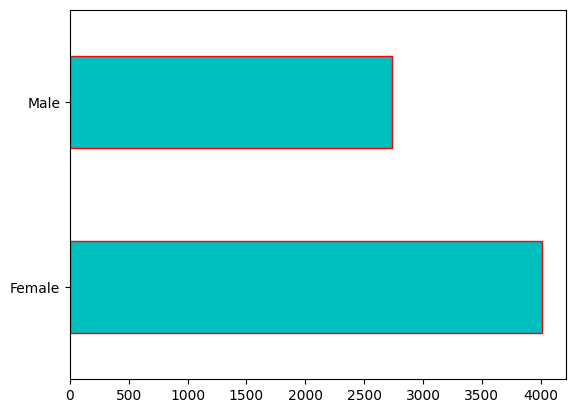

In [ ]:
vaccine['sex'].value_counts().plot(kind = 'barh', color = 'c',edgecolor = 'r')

In [ ]:
vaccine['income_level'].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

<Axes: ylabel='income_level'>

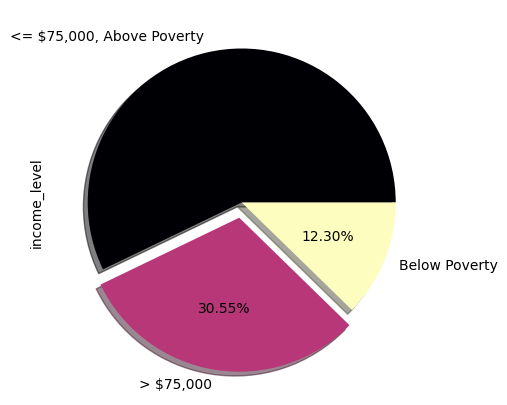

In [ ]:
vaccine['income_level'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', cmap = 'magma',
                                            explode = [0,0.1,0], figsize = [5,5], shadow = True)

In [ ]:
vaccine['income_level'].fillna('Unknown', inplace = True)

In [ ]:
vaccine['marital_status'].unique()

array(['Not Married', 'Married', nan], dtype=object)

In [ ]:
vaccine['marital_status'].value_counts()

Married        3407
Not Married    2984
Name: marital_status, dtype: int64

In [ ]:
vaccine['marital_status'].fillna(vaccine['marital_status'].mode()[0], inplace = True)

In [ ]:
vaccine['housing_status'].unique()

array(['Own', 'Rent', nan], dtype=object)

<Axes: >

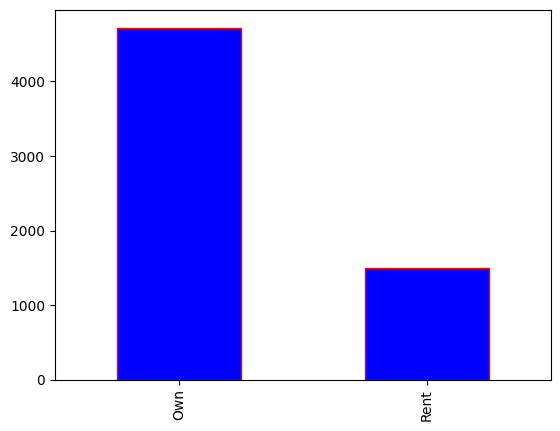

In [ ]:
vaccine['housing_status'].value_counts().plot(kind = 'bar', color = 'b', edgecolor = 'r')

In [ ]:
vaccine['housing_status'].fillna(vaccine['housing_status'].mode()[0], inplace = True)

In [ ]:
vaccine['employment'].unique()

array(['Not in Labor Force', 'Employed', 'Unemployed', nan], dtype=object)

<Axes: ylabel='employment'>

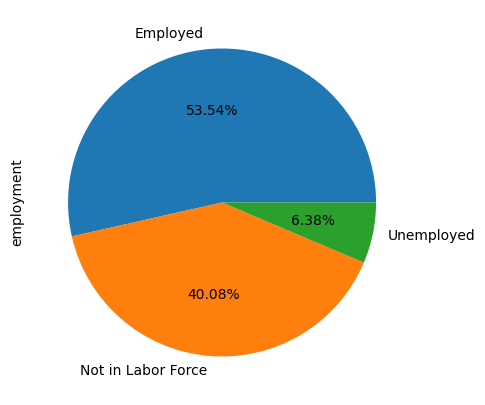

In [ ]:
vaccine['employment'].value_counts().plot(kind= 'pie', autopct = '%0.2f%%', figsize = [5,5])

In [ ]:
vaccine['employment'].fillna(vaccine['employment'].mode()[0], inplace = True)

In [ ]:
display(vaccine['no_of_adults'].unique(), vaccine['no_of_children'].unique())

array([ 0.,  2.,  1.,  3., nan])

array([ 0.,  3.,  2.,  1., nan])

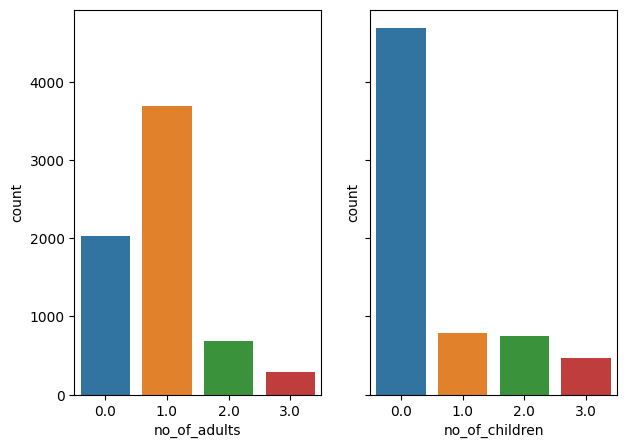

In [ ]:
fig, ax = plt.subplots(1,2, figsize = [7,5], sharey = True)
sns.countplot( x = 'no_of_adults', data = vaccine, ax = ax[0])
sns.countplot( x = 'no_of_children', data = vaccine, ax = ax[1])
plt.show()

In [ ]:
vaccine['no_of_adults'].fillna(vaccine['no_of_adults'].mode()[0], inplace = True)
vaccine['no_of_children'].fillna(vaccine['no_of_children'].mode()[0], inplace = True)

In [ ]:
vaccine['age_bracket'].value_counts()

65+ Years        1713
18 - 34 Years    1363
45 - 54 Years    1354
55 - 64 Years    1351
35 - 44 Years     969
Name: age_bracket, dtype: int64

In [ ]:
vaccine.isnull().sum()

h1n1_worry                     0
h1n1_awareness                 0
antiviral_medication           0
contact_avoidance              0
bought_face_mask               0
wash_hands_frequently          0
avoid_large_gatherings         0
reduced_outside_home_cont      0
avoid_touch_face               0
dr_recc_h1n1_vacc              0
dr_recc_seasonal_vacc          0
chronic_medic_condition        0
cont_child_undr_6_mnths        0
is_health_worker               0
has_health_insur               0
is_h1n1_vacc_effective         0
is_h1n1_risky                  0
sick_from_h1n1_vacc            0
is_seas_vacc_effective         0
is_seas_risky                  0
sick_from_seas_vacc            0
age_bracket                    0
qualification                357
race                           0
sex                            0
income_level                   0
marital_status                 0
housing_status                 0
employment                     0
census_msa                     1
no_of_adul

In [ ]:
vaccine1 = vaccine.astype({'h1n1_worry' : str, 'h1n1_awareness': str, 'antiviral_medication': str,
        'contact_avoidance': str, 'bought_face_mask': str, 'wash_hands_frequently': str,
        'avoid_large_gatherings': str, 'reduced_outside_home_cont': str,
        'avoid_touch_face': str, 'dr_recc_h1n1_vacc': str, 'dr_recc_seasonal_vacc': str,
        'chronic_medic_condition': str, 'cont_child_undr_6_mnths': str,
        'is_health_worker': str, 'has_health_insur': str, 'is_h1n1_vacc_effective': str,
        'is_h1n1_risky':str, 'sick_from_h1n1_vacc': str, 'is_seas_vacc_effective': str, 'age_bracket':str,
        'is_seas_risky': str,'sick_from_seas_vacc': str, 'no_of_adults': str, 'no_of_children': str,
        'h1n1_vaccine': str})
vaccine1.dtypes.value_counts()

object    33
dtype: int64

In [ ]:
vaccine_dummy = pd.get_dummies(vaccine1, drop_first= True)

In [ ]:
vaccine_dummy.shape

(6750, 71)

In [ ]:
vaccine_dummy['h1n1_vaccine_1.0'].value_counts(normalize = True)

0    0.784741
1    0.215259
Name: h1n1_vaccine_1.0, dtype: float64

In [ ]:
y=vaccine_dummy['h1n1_vaccine_1.0']
x=vaccine_dummy.drop(['h1n1_vaccine_1.0'], axis=1.0)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Var'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i)for i in range(len(x.columns))]


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
vif_data.sort_values(by = ['VIF'], ascending = False)

,Var,VIF
36,is_seas_risky_3.0,1.454697
20,is_h1n1_vacc_effective_3.0,1.302807
19,is_h1n1_vacc_effective_2.0,1.264232
28,sick_from_h1n1_vacc_3.0,1.172466
40,sick_from_seas_vacc_3.0,1.158766
...,...,...
48,qualification_College Graduate,0.021184
38,is_seas_risky_5.0,0.021148
14,chronic_medic_condition_1.0,0.012079
13,dr_recc_seasonal_vacc_1.0,0.002404


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.25, random_state=88)

In [ ]:
#LOGISTIC REGRESSION
log = LogsticRegression()

log.fit(x_train,y_train)

print(f"Training Score : {log.score(x_train, y_train)}")
print(f"Testing Score : {log.score(x_test, y_test)}")

In [ ]:
#MODELEVALUATION
pred_train=log.predict(x_train)
pred_test=log.predict(x_test)

In [ ]:
cnfTrain=pd.DataFrame(metrics.confusion_matrix(y_train , pred_train), columns=['pred_0', 'pred_1'],
                     index=["Act_0", "Act_1"])
cnfTrain

,pred_0,pred_1
Act_0,3771,199
Act_1,571,521


In [ ]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      3970
           1       0.72      0.48      0.58      1092

    accuracy                           0.85      5062
   macro avg       0.80      0.71      0.74      5062
weighted avg       0.84      0.85      0.84      5062



In [ ]:
cnfTrain=pd.DataFrame(metrics.confusion_matrix(y_test , pred_test), columns=['pred_0', 'pred_1'],
                     index=["Act_0", "Act_1"])
cnfTrain

,pred_0,pred_1
Act_0,1253,74
Act_1,165,196


In [ ]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1327
           1       0.73      0.54      0.62       361

    accuracy                           0.86      1688
   macro avg       0.80      0.74      0.77      1688
weighted avg       0.85      0.86      0.85      1688



In [ ]:
pd.DataFrame(log.predict_proba(x_train), columns=["prob_0", "prob_1"])

,prob_0,prob_1
0,0.631391,0.368609
1,0.942412,0.057588
2,0.977312,0.022688
3,0.858069,0.141931
4,0.900879,0.099121
...,...,...
5057,0.857654,0.142346
5058,0.936442,0.063558
5059,0.752116,0.247884
5060,0.771320,0.228680


In [ ]:
x_train1=x_train

,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,avoid_large_gatherings_1.0,...,census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0,h1n1_vaccine_nan,Actual_Default,Prob_Default
1569,0,0,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0.368609
4254,1,0,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0.057588
4643,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0.022688
1256,0,0,1,0,1,0,1,0,1,0,...,1,1,0,0,0,0,0,0,0,0.141931
1066,0,1,0,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0.099121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0.142346
2481,0,0,1,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0.063558
4047,0,0,1,1,0,0,1,0,1,1,...,1,1,0,0,0,1,0,0,0,0.247884
6432,1,0,0,1,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0.228680


In [127]:
 # Decile Analysis
 def profile_decile(x,y,trained_model):
     x_1=x.copy()
     y_1=y.copy()
     y_pred1=trained_model.predict_proba(x_1)
     x_1["Prob_Event"]=trained_model.predict_proba(x_1)[:,1]
     x_1["Y_actual"]=y_1
     x_1["Y_pred"]=y_pred1
     x_1["Rank"]=pd.qcut(x_1["Prob_Event"], 10, labels=np.arange(0,10,1))
     x_1["numb"]=10
     x_1["Decile"]=x_1["numb"]-x_1["Rank"].astype("int")

     profile=pd.DataFrame(x_1.groupby("Decile") \
                      .apply(lambda x: pd.Series({
        'min_score'    :x["Prob_Event"].min(),
        'max_score'    :x["Prob_Event"].max(),
        'Event'        :x["Y_actual"].sum(),
        'Non_event'    :x["Y_actual"].count()-x["Y_actual"].sum(),
        'total'        :x["Y_actual"].count()})))
     return profile

In [123]:
# train_profile=profile_decile(x_train, y_train,log)
# train_profile.to_excel("train_profile.x1sx")

# test_profile=profile_decile(x_test, y_test,log)
# test_profile.to_excel("test_profile.x1sx")

In [133]:
newtrain_pred=np.where(log.predict_proba(x_train)[:,1] > 0.232280104, 1, 0) # based on KS value

In [131]:
cnfNewTrain=pd.DataFrame(metrics.confusion_matrix(y_train , newtrain_pred), columns=["Pred_0", "Pred_1"],
                        index=["Act_0", "Act_1"])
cnfNewTrain

,Pred_0,Pred_1
Act_0,3224,746
Act_1,262,830


In [134]:
print(metrics.classification_report(y_train , newtrain_pred ))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      3970
           1       0.53      0.76      0.62      1092

    accuracy                           0.80      5062
   macro avg       0.73      0.79      0.74      5062
weighted avg       0.84      0.80      0.81      5062



In [143]:
newtest_pred=np.where(log.predict_proba(x_test)[:,1] > 0.229209326, 1, 0) # based on KS value

In [144]:
cnfNewTest=pd.DataFrame(metrics.confusion_matrix(y_test , newtest_pred), columns=["Pred_0", "Pred_1"],
                        index=["Act_0", "Act_1"])
cnfNewTest

,Pred_0,Pred_1
Act_0,1076,251
Act_1,72,289


In [145]:
print(metrics.classification_report(y_test , newtest_pred))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1327
           1       0.54      0.80      0.64       361

    accuracy                           0.81      1688
   macro avg       0.74      0.81      0.76      1688
weighted avg       0.85      0.81      0.82      1688



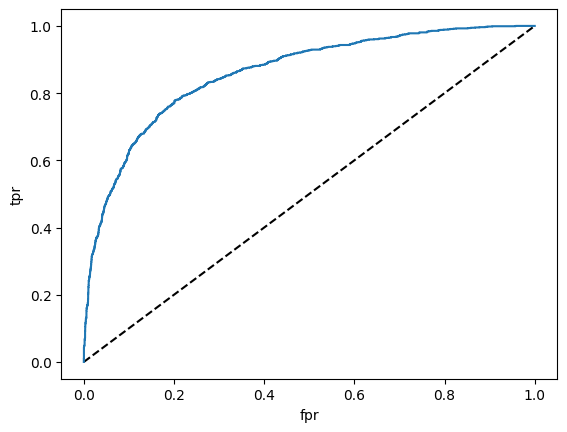

In [135]:
# Receiver Operating Characterestics

probs=log.predict_proba(x_train)[:,1]

fpr, tpr, threshold=metrics.roc_curve(y_train,probs)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='logistic')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [139]:
metrics.roc_auc_score(y_train,probs)

0.859921942037811

In [149]:
model_report = pd.DataFrame()

tmp = pd.Series({'Model': "Logical Regression",
                 'ROC Score' : metrics.roc_auc_score(y_test, newtest_pred),
                 'Precision Score': metrics.precision_score(y_test, newtest_pred),
                 'Recall Score': metrics.recall_score(y_test, newtest_pred),
                 'F1 Score': metrics.f1_score(y_test, newtest_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, newtest_pred)})
model_logR_report = model_report.append(tmp, ignore_index = True)
model_logR_report

<ipython-input-149-63bddbf74797>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_logR_report = model_report.append(tmp, ignore_index = True)


,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Logical Regression,0.805703,0.535185,0.800554,0.641509,0.808649
